# Определение признаков  популярности игры


**Цель исследования** 

Выявить закономерности, определяющие популярность(успешность) игры.  
Необходимо спрогнозировать популярную игру для будущих рекламных компаний.

**Описание данных**

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Ход исследования**
О качестве данных ничего не известно. Поэтому предварительно необходимо произвести обзор данных. 

 
Таким образом, работа по проекту пройдет по этапам:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ.   
- Определение портрета покупателей.   
- Проверка гипотез.  
 4. Выводы.



## Обзор данных

In [291]:
# импорт библиотек
# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# отображение графиков в jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# Зададим параметры отображения графиков
plt.rc('axes', titlesize = 15, grid = True)
plt.rc('grid', alpha = 0.2)
plt.rc('figure', figsize = (11, 5))

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None) 

import seaborn as sns
colors=sns.color_palette("viridis", 3)

# изменение дефолтного размера графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11, 5

from scipy import stats as st
from scipy.stats import norm

# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

In [284]:
colors

[(0.253935, 0.265254, 0.529983),
 (0.163625, 0.471133, 0.558148),
 (0.134692, 0.658636, 0.517649),
 (0.477504, 0.821444, 0.318195)]

In [95]:
# чтение таблицы с данными и сохранение в data
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [96]:
#Выведем первые 10 строчек датафрейма data на экран.
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [97]:
# изучим общую информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего **16715 записи**  
В таблице **11 колонок**  
Типы данных во всех столбцах — **object, float64**  
очень много пропусков  

В названиях колонок обнаружены нарушения стиля
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Вывод:**  
Анализ данных показал, что необходимо:

1. Привести названия всех колонок к единому стилю.
2. Измененить типа данных в столбцах `Year_of_Release` и `user_score`.
3. Проанализировать пропуски, постараться понять причину их возникновния. Воможно заполнить их там, где это необходимо. 

Приступим к этапу предобработки данных.

## Предобработка данных

### Приведение названий столбцов к единому стилю

In [98]:
# приведем колонки к нижнему регистру
data.columns = data.columns.str.lower()

### Анализ пропусков 

In [99]:
def pass_value_barh(df):
    try:
        ( 
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (8,4), rot = -5, legend = False, fontsize = 10, color = colors[1])
            .set_title('% of NaN (из {} строк)'.format(len(df)) + "\n", fontsize = 15, color = 'black')    
     
   
        );    
    except:
        print('пропусков не осталось :) ')
        

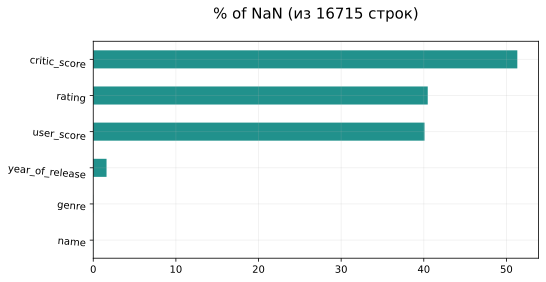

In [100]:
pass_value_barh(data);

Основная масса пропусков в данных оценок/рейтинга игры.  
Предположительно можно сделать вывод что есть связь в этих колонках.
Шесть колонок содержат пропуски. 
Проанализируем каждую колонку на пропуски и познакомимся с данными.


### Колонка name 

In [101]:
#опредлим сколько уникальных значений в наимновании игр
name_games=data['name'].copy().value_counts().to_frame().reset_index()
print('Количество игр за расматриваемый приод:', len(name_games))

Количество игр за расматриваемый приод: 11559


In [102]:
#выделим повторящиеся значния. уникальны исключим
name_games.query('name != 1')

,index,name
0,Need for Speed: Most Wanted,12
1,Ratatouille,9
2,LEGO Marvel Super Heroes,9
3,FIFA 14,9
4,Madden NFL 07,9
...,...,...
2800,Oddworld: Munch's Oddysee,2
2801,Dragon Ball: Raging Blast,2
2802,Blood Drive,2
2803,Need for Speed: Porsche Unleashed,2


In [103]:
# Need for Speed: Most Wanted всетрчатся 12 раз, посмотрим, вдруг дубликаты
data[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [104]:
#посмотрим пропуски в данных наименования игры
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [105]:
#посмотрим данные по платформе GEN
data[data["platform"]=='GEN']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994.0,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN


**Вывод:**
* Данные в колонке наименование игры связаны с платформами, для которых они выпущены. 
* Данные содержат специальные символы.  
* Пропуски есть в двух строчках.  
* У пропусков одинаковая платформа GEN и год выпуска 1993. По ним были продажи. Однако данные рейтингов пустые.   

Так как были продажи, вероятно предположить, что пропуски появились при выгрузке данных. Хотя мы достоверно незнаем как эта таблица получилась, автоматически или эти данные вносились первоначально вручную.
Так как пропуски в имени и еще в других колонках и восстановить их значение не предоставляется возможным, а количество минимальное,- удалим их.

In [106]:
#удаляем пропуски в имени
data = data[~(data['name'].isna())]

### Колонка platform

In [107]:
data['platform'].describe()

count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

In [111]:
data['platform'].value_counts().to_frame().T

,PS2,DS,PS3,Wii,X360,PSP,PS,PC,XB,GBA,GC,3DS,PSV,PS4,N64,XOne,SNES,SAT,WiiU,2600,NES,GB,DC,GEN,NG,SCD,WS,3DO,TG16,GG,PCFX
platform,2161,2151,1331,1320,1262,1209,1197,974,824,822,556,520,430,392,319,247,239,173,147,133,98,98,52,27,12,6,6,3,2,1,1


Подозрительно выглядит платформа - 2600. Однако такая действитльно существовала Atari 2600.  
Пропусков нет. Данные заполненные коррекно. 

### Колонка year_of_releas

In [112]:
# посмотрим пропуски в данных
data[data['year_of_release'].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
2169,Yakuza 4,PS3,NaN,Action,0.15,0.13,0.63,0.05,78.0,8,M
5800,Slot Machine,2600,NaN,Action,0.29,0.02,0.00,0.00,NaN,NaN,NaN
14325,Beyond the Labyrinth,3DS,NaN,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
16017,Dream Dancer,DS,NaN,Misc,0.01,0.00,0.00,0.00,NaN,tbd,E
9043,Bejeweled 3,PS3,NaN,Puzzle,0.13,0.00,0.00,0.02,76.0,8.2,E
5588,Final Fantasy XI,PS2,NaN,Role-Playing,0.08,0.06,0.15,0.02,85.0,6.9,T
14546,Combat Elite: WWII Paratroopers,XB,NaN,Shooter,0.02,0.01,0.00,0.00,56.0,tbd,T
15006,Tube Slider,GC,NaN,Racing,0.02,0.00,0.00,0.00,62.0,tbd,E


In [113]:
#опредеим долю пропусков в колонке year_of_releas
print("доля пропусков year_of_releas:", (data['year_of_release'].isna().sum()*100/len(data)).round(2))

доля пропусков year_of_releas: 1.61


In [114]:
# создадим функцию анализа связи спропусков двух колонок. 
def nan_dev (col1, col2):
#Соберем данные для анализа    
    report = (
            data
            .copy()
            .groupby(col1)[col2]
            .agg([lambda d: (d.count() + d.isna().sum()), lambda d: d.isna().sum()])
            .reset_index()
    )
    
    report.columns=[col1, 'count', 'nan_sum']
    report = report[report['nan_sum'] != 0].sort_values(by = 'nan_sum')
    report['dev'] = (report['nan_sum']*100/report['count']).round(2)
    report.sort_values(by = 'dev')
    return(report)

In [116]:
#сохраним данные в перемнные, при желании можно посмотрть табличные данные
platform_year  = nan_dev('platform', 'year_of_release')
genre_platform = nan_dev('genre', 'year_of_release')

In [118]:
platform_year.T

,5,20,10,15,2,6,7,19,0,13,29,17,4,28,16,26
platform,GB,PSV,N64,PS,3DS,GBA,GC,PSP,2600,PC,XB,PS3,DS,X360,PS2,Wii
count,98,430,319,1197,520,822,556,1209,133,974,824,1331,2151,1262,2161,1320
nan_sum,1,1,3,7,8,11,14,16,17,17,21,25,30,30,34,34
dev,1.02,0.23,0.94,0.58,1.54,1.34,2.52,1.32,12.78,1.75,2.55,1.88,1.39,2.38,1.57,2.58


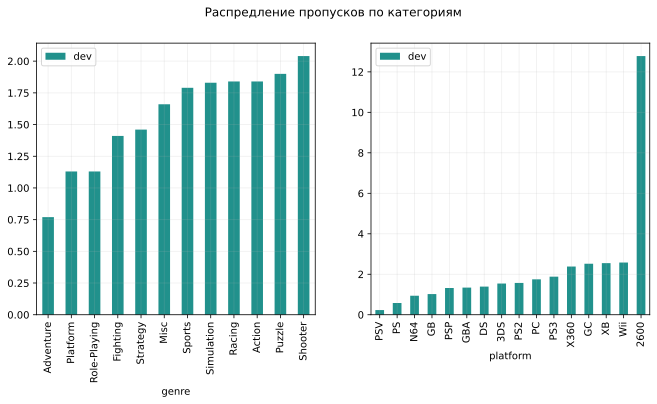

In [119]:
# визуализируем распределние пропусков

# пропуски в зависимости от платформы 
(platform_year
.sort_values(by = 'dev')
.plot(kind='bar', x = 'platform', y = 'dev', color = colors[1], ax = plt.subplot(122))
)
# пропуски в зависимости от жанра 
(genre_platform
.sort_values(by ='dev')
.plot(kind='bar', x ='genre', y ='dev', color = colors[1] , ax = plt.subplot(121))
)
plt.suptitle("Распредление пропусков по категориям");

**Вывод:**
* Всего в колонке year_of_releas обнаружено пропусков 269. Это 1.61%.  
* Пропуски распределены практически равномерно. Связи в пропусках с другими данными не обнаружены. 
* После анализа с другими колонками можно сделать вывод, что удаление пропусков не повлияет на дальнейший анализ. 
* Заполнить пропуски не предоставляется возможным  

Причину появления пропусков очень сложно опередить, так как их мало и связи с другими данными отсутствуют.  
На основании изложенного приято решение удалить данные.


In [120]:
#удалим пропуски
data = data[~(data['year_of_release'].isna())]

In [121]:
#приведем данные типу int, для убодства работы
data['year_of_release'] = pd.to_datetime(data['year_of_release'],format='%Y').dt.year

### Колонка genre 

In [122]:
data['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Пропуски отсутствуют. Данные заполнены корректно. Неявные дубликаты отсутствуют.

### Колонки na_sales, eu_sales, jp_sales, other_sales

In [123]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16444.000000,16444.000000,16444.000000,16444.000000
mean,0.264012,0.145930,0.078487,0.047594
std,0.818378,0.506716,0.311100,0.188005
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


In [124]:
print('число значний "0" в na_sales', len(data.query('na_sales == 0')))
print('число значний "0" в eu_sales', len(data.query('eu_sales == 0')))
print('число значний "0" в jp_sales', len(data.query('jp_sales == 0')))

число значний "0" в na_sales 4449
число значний "0" в eu_sales 5766
число значний "0" в jp_sales 10300


In [125]:
# количество значений, где в колонках продаж везде нули
len(data.query('na_sales==0 and eu_sales==0 and jp_sales==0'))

3

**Вывод**
* В данных нет отрицательных значений, но есть существенные выбросы. 
* Пропусков нет.
* Много нулевых значений. Вероятно, не все игры продавались по всем регионам. В Японии больше всего нулей.
* Определенно есть связь данных между данными продаж игр по регионам 

### Колонки сritic_score, user_score, rating

#### Колонка сritic_score

In [126]:
data['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
20.0      3
29.0      3
21.0      1
17.0      1
13.0      1
Name: critic_score, Length: 81, dtype: int64

In [127]:
#проверим, есть ли значния выпадающие за граница диапазона от 0 до 100
data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [128]:
# Посмотрим зависимость пропусков от года выпуска
year_critic_score  = nan_dev('year_of_release', 'critic_score')

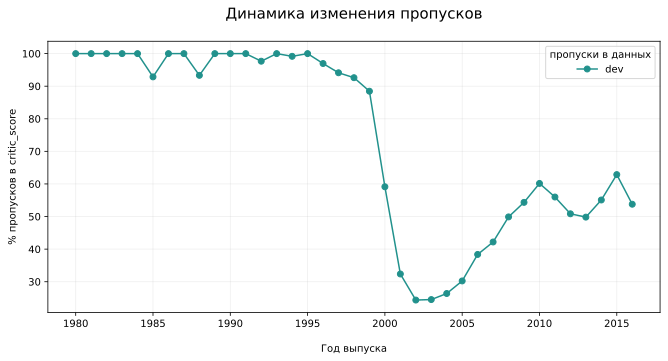

In [129]:
(year_critic_score
                    .sort_values(by='year_of_release')
                    .plot(x='year_of_release', y='dev', style='o-', color = colors[1])
)
plt.legend(title = 'пропуски в данных')
plt.title("Динамика изменения пропусков" + '\n')
plt.xlabel('\n'+"Год выпуска")
plt.ylabel("% пропусков в critic_score");

* доля пропусков уменьшаются с увеличеним года, до 2002. Затем начинатся опять постепенный рост
* для вывода нужно рассмотреть связи с другими кологками оценки/рейтинга

#### Колонка user_score 

In [130]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [131]:
data['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

**Аббревиатура tbd встречается 2376. To Be Determined**   
Данная аббревиатура проставляется, когда, у игры недостаточно данный чтобы посчитать рейтинг.  
Данные значения по факту нулевые, пропуски. Поэтому заменим их на nan, чтобы в дальнейшем было удобно работать с оценкой/рейтингом.


In [132]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')

In [133]:
#Посмотрим зависимость пропусков от года выпуска
year_critic_score  = nan_dev('year_of_release', 'user_score')


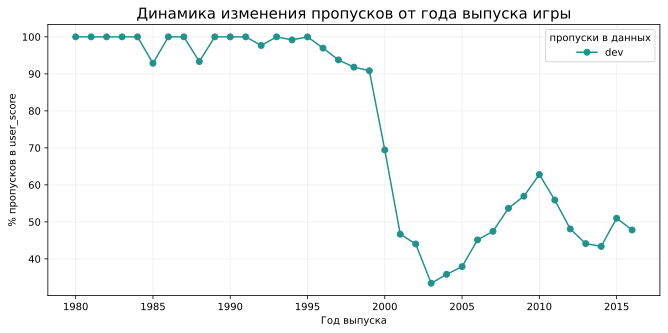

In [134]:
(year_critic_score
      .sort_values(by='year_of_release')
      .plot(x='year_of_release', y='dev', style='o-', color = colors[1])
);
plt.legend(title = 'пропуски в данных')
plt.title("Динамика изменения пропусков от года выпуска игры")
plt.xlabel("Год выпуска")
plt.ylabel("% пропусков в user_score");

График пропусков  оценки пользователей схож с графиком пропусков оценки критиков

In [135]:
#Посмотрим на данные за 2015 год, где есть проуски в оценке критиками и есть заполненные данные в оценке пользователей.
data[(data['year_of_release']==2015) & (data['critic_score'].isna()==True)& (data['user_score'].isna()==False)] \
.sort_values(by='name').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12567,Atelier Sophie: The Alchemist of the Mysteriou...,PSV,2015,Role-Playing,0.00,0.00,0.06,0.00,NaN,8.0,T
15750,Back to the Future: The Game,XOne,2015,Adventure,0.00,0.02,0.00,0.00,NaN,7.3,T
15376,Back to the Future: The Game,X360,2015,Adventure,0.02,0.00,0.00,0.00,NaN,7.5,NaN
8190,Back to the Future: The Game,PS4,2015,Adventure,0.10,0.05,0.00,0.03,NaN,7.1,T
16300,Barbie and Her Sisters Puppy Rescue,WiiU,2015,Action,0.00,0.01,0.00,0.00,NaN,2.8,E
4681,Battlefield: Hardline,PS3,2015,Shooter,0.13,0.15,0.07,0.06,NaN,5.3,M
6094,Battlefield: Hardline,X360,2015,Shooter,0.17,0.09,0.00,0.03,NaN,4.1,M
14635,Bladestorm: Nightmare,PS3,2015,Action,0.00,0.00,0.03,0.00,NaN,7.4,T
12231,BlazBlue: Chrono Phantasma Extend,XOne,2015,Action,0.05,0.01,0.00,0.01,NaN,6.3,T
13861,BlazBlue: Chrono Phantasma Extend,PS3,2015,Action,0.00,0.00,0.04,0.00,NaN,8.3,T


* пропуски в колонках оценка критиков и оценка пользователей совпадают.
* пропуски в играх присутствуют для разных платформ. Тут нет зависимости.  
* Пропуски присутствуют в разные годы.   
Предположить вариант, что произошел сбой при выгрузке практически нельзя. Есть связь.

Можно сделать предположение, что пропуски  появились неслучайно.

#### Колонка rating

<a href="https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board">ESRB</a>  негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде Система оценок для каждого региона своя.  
<a href="https://ru.wikipedia.org/wiki/Pan_European_Game_Information">Для Европы</a> с 2003  
<a href="https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization">Для Японии</a> с 2002  

Таким образом ESRB действует только для Северной Америки. Проверим, что в предоставленных нам данных рейтинг относится только к Северной Америке.

In [137]:
#уникальные значения и их количество
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [138]:
# количество значений в рейтингах по продажам в Европе и Японии.
data.query('na_sales == 0')[['na_sales','eu_sales','jp_sales','critic_score', 'user_score','rating']].count()

na_sales        4449
eu_sales        4449
jp_sales        4449
critic_score     617
user_score       679
rating           761
dtype: int64

In [139]:
# количество значений по продажам только в Японии
data.query('na_sales == 0 and eu_sales == 0 ')[['na_sales','eu_sales','jp_sales','critic_score', 'user_score','rating']].count()

na_sales        3364
eu_sales        3364
jp_sales        3364
critic_score      95
user_score       105
rating           132
dtype: int64

**На основе анализа полученных данных:**  

*  в более ранние годы, когда игры только появлялись, система оценки только зарождалась и вероятно это причина пропусков среди данных оценок и рейтинга;   
*  первые оценки появляются в 1985 году и только с 1995 года носят систематический характер, 
*  с развитием отрасли количество выпускаемых игр увеличивается и одновременно вероятно регламентируется порядок размещения оценок, так как есть игры с высоким числом оценок пользователей и отсутствием оценок критиков
* много совместных пропусков рейтинга, оценки пользователей и критиков. Однако не у всех игр такая зависимость. Поэтому можно сделать предположение, что пропуски появились по причине различного принципа/порядка/регламента проставления рейтинга и оценок в системе. 
* ESRB рейтинг распространяется только на Северную Америку. В данных представлены игры, которые выпускались в разных регионах(странах), которые используют свою систему рейтинга.  

Полагаясь на собранные данные, принято решение заменить пропуски маркером NN. NN - показывает, что игра выпускалась в другой стране и по ней нет данных рейтинга. 
Так как остальные пропуски появились неслучайно, оставим как есть. Их распределение и зависимость изучены.  

In [140]:
#заполним пропуски маркером
data['rating']=data['rating'].fillna('NN')

In [141]:
#проверим заполнение
data['rating'].value_counts()

NN      6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

## Исследовательский анализ

In [142]:
# определим суммарные продажи во всех регионах и запишем их в отдельную колонку
data['total_sales'] = data[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

### Динамика выпуска игр по годам

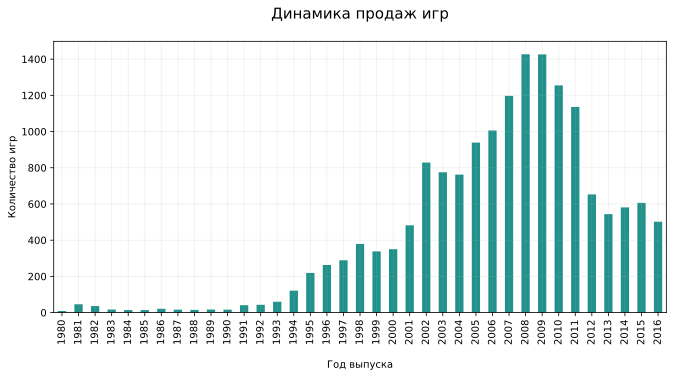

In [143]:
# посмотрим динамику продаж по годам
data.groupby('year_of_release')['total_sales'].count().plot.bar(color = colors[1])

plt.title('Динамика продаж игр'+'\n')
plt.xlabel('\n'+'Год выпуска')
plt.ylabel('Количество игр');

* Данные представлены с 1980 по 2016 год. 
* Рост продаж игр в представленных платформах начинается с 1994 года. Далее резкий скачок и после 2011 спад. 
* Максимальный выпуск произошел в 2008 и 2009 годы. В эти года выпускалось примеро по 1400 игр в год.
* В совокупности с графиком пропусков в данных по рейтингу и оценкам, можно сделать вывод, что для дальнейшего исследования лучше использовать выборку с 2004 по 2016. Но это предположительный вывод.

### Динамика продаж по платформам

Определим изменение продаж по платформам. И выберем платформы с наибольшими суммарными продажами.

In [149]:
d_plt

,platform,total_sales
0,2600,86.48
1,3DO,0.10
2,3DS,257.81
3,DC,15.95
4,DS,802.78
5,GB,254.43
6,GBA,312.88
7,GC,196.73
8,GEN,28.35
9,GG,0.04


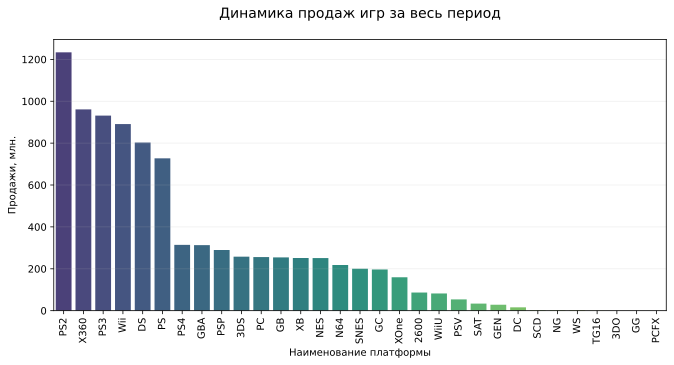

In [153]:
#сгруппируем данные
d_plt = (data
         .sort_values(by="year_of_release")
         .groupby('platform')['total_sales']
         .sum()
         .reset_index()
         .sort_values(by='total_sales', ascending=False))

#Выделим данные цветом платформы с наибольшими суммарными продажами
pal = sns.color_palette("viridis",len(d_plt['total_sales'])+5)
rank = d_plt['total_sales'].argsort().argsort()                         

sns.barplot(data=d_plt, x='platform', y='total_sales', palette=np.array(pal[::-1])[rank])
plt.title("Динамика продаж игр за весь период"+'\n', fontsize=14)
plt.xlabel("Наименование платформы")
plt.xticks(rotation=90)
plt.ylabel("Продажи, млн.");

Есть четкое деление платформ по объемам продаж. Выше 400 и ниже

In [154]:
# выберем платформы с продажами больше 400 млн копий за весь период существования. Популярные платформы
list_plt_top = d_plt.query('total_sales > 400')['platform'].to_list()
list_plt_top

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [157]:
# определим динамику продаж по популярным платформам
data_plt_top =( 
            data
            .query('year_of_release != 1985') #уберем выброс для платформы DS
            .loc[data['platform'].isin(list_plt_top)] #платформы с продажами больше 400 млн копий за весь период
            .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
            )
data_plt_top.T

year_of_release,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
PS,6.03,35.96,94.7,136.17,169.49,144.53,96.37,35.59,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,NaN,NaN,NaN,NaN,NaN,NaN,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


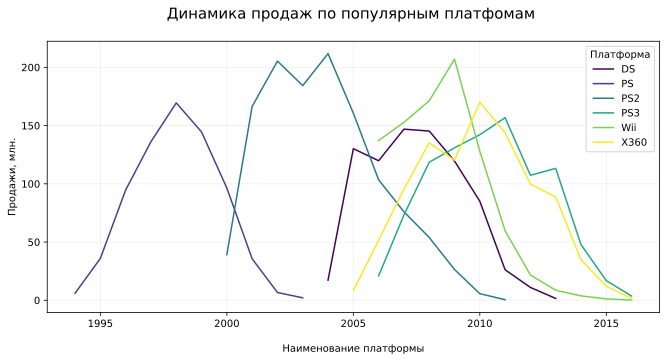

In [158]:
# визуализируем динамику продаж по популярным платформам
data_plt_top.plot(cmap = "viridis" )
plt.legend(title = 'Платформа')
plt.title("Динамика продаж по популярным платфомам "+'\n')
plt.xlabel('\n'+"Наименование платформы")
plt.ylabel("Продажи, млн.");

In [159]:
#определим жизненный цикл для каждой платфомы 

print(data_plt_top.count().sort_values())
print('\n'+'Жизннный цикл платформы:', round(data_plt_top[list_plt_top].count().mean()), "лет")

platform
DS      10
PS      10
PS3     11
Wii     11
PS2     12
X360    12
dtype: int64

Жизннный цикл платформы: 11 лет


**Вывод:**

*  Среди представленных платформ, срок их "жизни" составляет, в среднем 11 лет.
*  У всех платформ на графике в 2016 году наблюдается спад. 
*  Есть 4 платформы, которые вышли на рынок около 2005 года и уже к 2015 году заканчивают свой путь.
*  11 лет — это достаточно большой срок. Мы живем в период резкого технологического развития и техника устаревает быстро. Платформы, устроены таким образом, что сделать обновление технических показателей сложно. Тут только может похвастаться PC, так как он имеет возможность практически постоянно совершенствовать. Покупатели хотят все лучше качество, виртуального присутствия и скорости обработки.

In [160]:
#посмотрим остальные платформы, сумма продаж которых составляет меньше 400 и больше 100млн копий в год
list_plt_top_non = (d_plt.query('total_sales <= 400 and total_sales >= 100 ')
                        .sort_values(by = 'total_sales')['platform']
                        .to_list())
list_plt_top_non

['XOne',
 'GC',
 'SNES',
 'N64',
 'NES',
 'XB',
 'GB',
 'PC',
 '3DS',
 'PSP',
 'GBA',
 'PS4']

In [162]:
# Данные по платформам  
data_plt_ntop=(
         data
        .copy()
        .loc[data['platform'].isin(list_plt_top_non)] #исключаем платформы, которые уже проанализировали
        .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
             )
data_plt_ntop.T

year_of_release,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
GB,NaN,NaN,NaN,NaN,NaN,1.43,64.97,4.89,5.57,25.49,NaN,12.18,3.60,36.03,6.37,26.90,38.00,19.76,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.34,51.81,50.61,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.10,39.50,49.24,57.87,33.97,3.25,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NES,10.96,50.08,53.44,36.41,19.76,45.01,7.85,15.73,6.11,1.98,3.61,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,NaN,NaN,0.04,NaN,NaN,0.03,NaN,NaN,NaN,3.03,NaN,12.87,4.22,10.58,11.27,3.26,4.74,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN


''

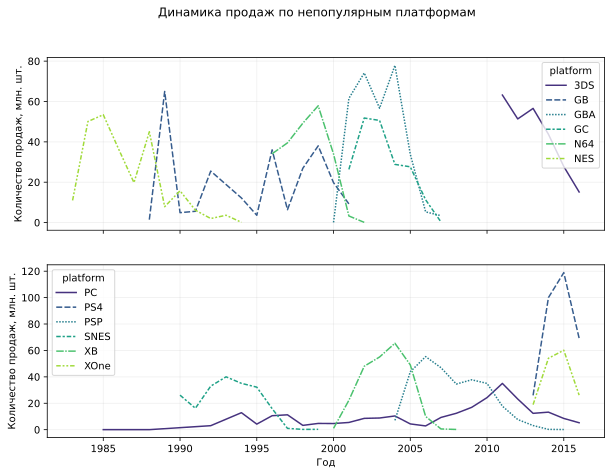

In [163]:
#визуализируем данные продаж по платформам
#создадим две области для отображения
fig, [ax1, ax2] = plt.subplots(2, 1,figsize=(10, 7), sharex=True)

#визуализируем первую часть платформ, выбирая срезом по колонкам
sns.lineplot(
    data=data_plt_ntop.iloc[:,:data_plt_ntop.shape[1]//2], 
    palette = sns.color_palette("viridis"),
    ax=ax1)

ax1.set_ylabel('Количество продаж, млн. шт.')

#визуализируем вторуюч часть платформ, выбирая срезом по колонкам
sns.lineplot(
    data=data_plt_ntop.iloc[:,data_plt_ntop.shape[1]//2:], 
    palette = sns.color_palette("viridis"),
    ax=ax2)

ax2.set_ylabel('Количество продаж, млн. шт.')
ax2.set_xlabel('Год')
fig.suptitle('Динамика продаж по непопулярным платформам')
;

In [164]:
#срок платформы на рынке
data_plt_ntop[data_plt_ntop.columns].count().sort_values().to_frame().T

platform,PS4,XOne,3DS,GC,N64,GBA,XB,SNES,NES,PSP,GB,PC
0,4,4,6,7,7,8,9,10,12,12,13,26


**Из полученных данных видно:**
* Среди популярных платформ (продажи более 400 млн. копий игр) срок жизни составляет 11 лет и к 2016 году наблюдается спад.  
Это интересный факт, который указывает на изменение спроса на рынке
* Среди непопулярных платформ (продажи менее 400 млн. копий игр) срок жизни составляет 10 лет  
* С 2012 года на рынке появляются новые платформы, которые набирают рост по продажам. 
* Платформа PC выглядит стабильнее относительно других платформ
* В 2016 году происходит резко падение доходов. Так как это может быть причиной что 2016 год попал не полностью, то исключим его из будущего анализа  

**С 2013 по 2015 гг, после резкого падения продаж, наблюдается плато. Поэтому для дальнейшего анализа я буду использовать этот период.**


### Анализ по выборке

In [169]:
#отберем данны за период с 2014 по 2016 г.
df_period = data.query('year_of_release >= 2013 and year_of_release < 2016') 

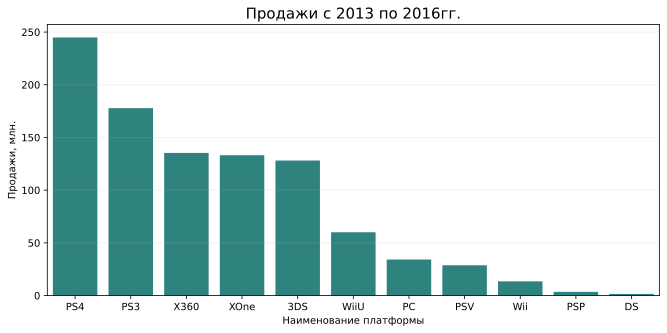

In [170]:
# отпределим самые прибыльные платформы
df_plt = (
    df_period
    .groupby('platform')['total_sales']
    .sum()
    .reset_index()
          ).sort_values(by="total_sales", ascending=False)

sns.barplot(data=df_plt, x='platform', y='total_sales',  color = colors[1]);
plt.title("Продажи с 2013 по 2016гг.")
plt.xlabel("Наименование платформы")
plt.ylabel("Продажи, млн.");

In [171]:
#выделим Топ-5 популярных платфом
df_plt_top = df_plt[:5]['platform'].to_list()
df_plt_top

['PS4', 'PS3', 'X360', 'XOne', '3DS']

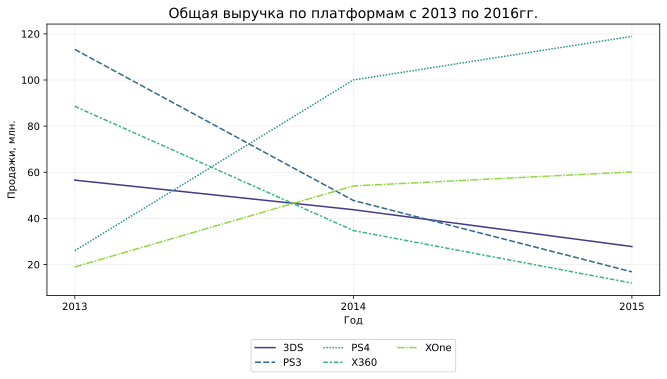

In [172]:
#проанализируем динамику измнения продаж по каждой из платформ за выбранный период с учетом популяпных платформ
df_platform_years = (df_period
                     .query('platform == @df_plt_top')
                     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
                    )

#визуализируем даннные
sns.lineplot(data=df_platform_years,  palette = 'viridis')

plt.title('Общая выручка по платформам с 2013 по 2016гг.', fontsize=14)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol= 3);
plt.xlabel('Год')
plt.ylabel('Продажи, млн.')
plt.xticks(df_platform_years.index);

In [173]:
df_platform_years

platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2013,56.57,113.25,25.99,88.58,18.96
2014,43.76,47.76,100.00,34.74,54.07
2015,27.78,16.82,118.90,11.96,60.14


In [60]:
# Агрегированные данные продаж по платформам за 4 года
(
    df_platform_years[df_platform_years.columns]
    .apply(['min', 'max', 'sum', 'mean'])
    .sort_values(by='sum', ascending=False, axis=1).style.format("{:,.2f}")
)

platform,PS4,PS3,X360,XOne,3DS
min,25.99,16.82,11.96,18.96,27.78
max,118.90,113.25,88.58,60.14,56.57
sum,244.89,177.83,135.28,133.17,128.11
mean,81.63,59.28,45.09,44.39,42.70


**Вывод:**
*	ТОП-5 по продажам игр: PS3, X360, PS4, 3DS, XOne
*	PS3 и X360 лидеры по продажам за указанный период, однако их продажи падают и к 2015 году составляют 17 и 12 млн. соответственно.
*	Потенциальными для роста, с положительной динамикой на графике являются платформы PS4 и XOne(они 4 года на рынке)
*	PS4 исключаю так как она на рынке 6 лет, и принятый 11 летний цикл, делаю предположение о ее дальнейшем падении. И по динамике продаж у них тоже заметен спад.

### Анализ платформ по глобальным продажам

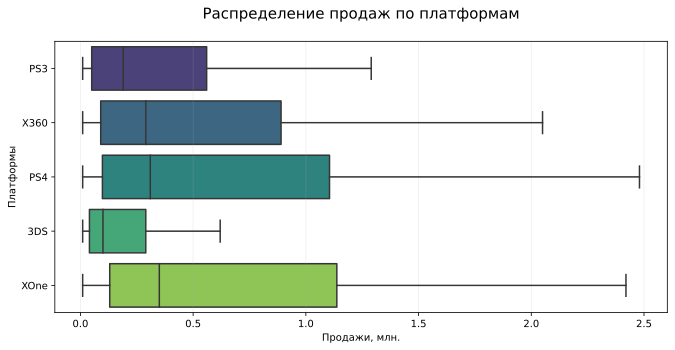

In [174]:
# построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
sns.boxplot(x = 'total_sales', 
            y = 'platform', 
            data = df_period.query('platform in @df_plt_top'), 
            palette='viridis',
            orient="h",
            showfliers=False
           )


plt.title("Распределение продаж по платформам"+'\n')
plt.ylabel("Платформы")
plt.xlabel("Продажи, млн.");

In [175]:
#построим descride для точного определения границ
df_period.query('platform in @df_plt_top')[['platform', 'total_sales']].pivot(columns='platform').describe()

total_sales                                                
platform         3DS         PS3         PS4        X360        XOne
count     257.000000  307.000000  228.000000  173.000000  160.000000
mean        0.498482    0.579251    1.074079    0.781965    0.832312
std         1.431660    1.530432    1.899788    1.715684    1.182243
min         0.010000    0.010000    0.010000    0.010000    0.010000
25%         0.040000    0.050000    0.097500    0.090000    0.130000
50%         0.100000    0.190000    0.310000    0.290000    0.350000
75%         0.290000    0.560000    1.105000    0.890000    1.137500
max        14.600000   21.050000   14.630000   16.270000    7.390000

* По всем платформам распределение данных скошено вправо, длинный хвост. Много выбросов. Медиана смещена влево. 
* Верхняя граница предела коробки(75%) варируется, самая низкая у 3DS и составляет - 0,31, самая высокая у X360 - 0,87
* Медиана несильно отличатся у популярных платформ, находится в диапазоне от 0,2 до 0,31

Платформы PS4 и XOne обладают наибольшей популярностью и потенциалом, так как распределение значений продаж игр на этих платформах самое большое - верхние границы усов находятся на уровне около 1.5 миллиона проданных копий. При этом границы квартилей и медиан также находятся на близком уровне, соответственно мы можем сделать вывод о схожести распределений продаж игр на данных платформах.

### Анализ зависимости продаж от оценок пользователей и критиков

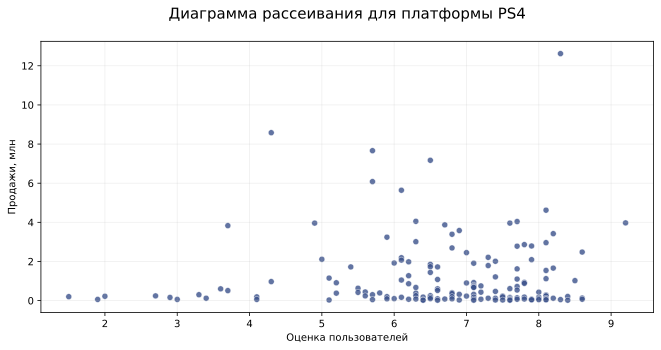

In [184]:
#Построим диаграмму рассеяния продаж от оценки пользователей для PS4 
sns.scatterplot(data = df_period.query('platform == "PS4" '), 
                x = 'user_score', 
                y = 'total_sales', 
                color = colors[0],
                alpha = 0.8)

plt.title("Диаграмма рассеивания для платформы PS4"+"\n")
plt.ylabel("Продажи, млн")
plt.xlabel("Оценка пользователей");

In [177]:
#отпределим один из выбросов
df_period.query('platform == "PS4" and 4 <= user_score and 5 >= user_score and total_sales > 8 ')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


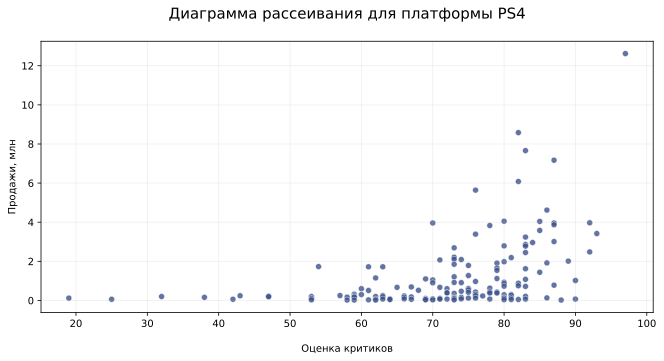

In [185]:
#Построим диаграмму рассеяния для PS4 от оценки критиков
sns.scatterplot(data = df_period.query('platform == "PS4"'), 
                x = 'critic_score', 
                y = 'total_sales', 
                color = colors[0],
                alpha = 0.8)

plt.title("Диаграмма рассеивания для платформы PS4"+"\n")
plt.ylabel("Продажи, млн")
plt.xlabel("\n"+"Оценка критиков");

In [186]:
#Коэффициенты корреляции PS4 
df_period.query('platform == "PS4"')[['total_sales','critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.431848,0.024231
critic_score,0.431848,1.000000,0.612451
user_score,0.024231,0.612451,1.000000


* Зависимость продаж от оценок критиков выше и составляет 0,4. Зависимость прямая, положительная.
* Зависимость от оценок пользоватлей отрицательная. Небольшая обратная зависимость.
* Среди оценок пользователей есть выбросы. 
* Характерный выброс это игра FIFA 16, которая с оценкой пользователей в 4.3, принесла суммарных продаж 8.58 млн копий. 

In [187]:
# Посмотрим зависимость оценок для всех популярных приставок
list=[]

for i in df_plt_top:
    
    d = df_period.query('platform == @i')[['total_sales','critic_score', 'user_score']].corr()
    list_name =[i + ' total_sales', 'critic_score', 'user_score']
    d.columns = list_name;
    d = d.drop(d.columns[[1,2]], axis = 1)
    list.append(d)

df_plt_corr = pd.concat(list, axis= 1 )
df_plt_corr = df_plt_corr[1:]


In [195]:
df_plt_corr

,PS4 total_sales,PS3 total_sales,X360 total_sales,XOne total_sales,3DS total_sales
critic_score,0.431848,0.334285,0.350345,0.459385,0.384326
user_score,0.024231,-0.016333,-0.034562,-0.039268,0.264711


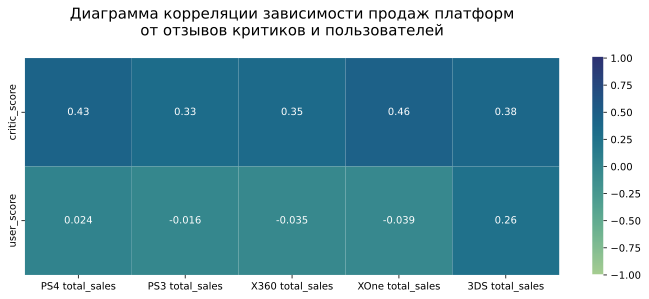

In [196]:
# рассчёт коэффициента корреляции Пирсона для продаж и отзывов
fig, ax = plt.subplots(figsize = (12, 4))
sns.heatmap(df_plt_corr, cmap = "crest", vmin=-1, vmax=1, annot=True)
plt.title('Диаграмма корреляции зависимости продаж платформ'+'\n'+'от отзывов критиков и пользователей'+'\n');


**На основании полученных данных:**
* По всем популярным платформам есть слабая положительная зависимость от оценки критиков. 
* Зависимость от оценки пользователей очень слабая, практически нет.
* Зависимость для потенциально растущих платформ незначительная и отрицательная от оценки пользователей. Можно сказать, что ее вообще нет. А вот от оценки критиков зависимость для перспктивных платформ намного лучше.


### Анализ распределения игр по жанрам

In [198]:
#соберем данные о количестве выпущенных игр и продаж по жанрам
data_genre = df_period.groupby('genre')['total_sales'].agg(['sum','count', 'median']).sort_values(by='sum', ascending=False)
data_genre.columns = ['total_games', 'total_sales', 'median']
data_genre.T

genre,Action,Shooter,Role-Playing,Sports,Misc,Platform,Racing,Fighting,Simulation,Adventure,Strategy,Puzzle
total_games,291.76,194.760,127.71,127.160,60.22,39.40,37.10,30.84,19.870,19.82,8.95,3.160
total_sales,588.00,140.000,238.00,166.000,123.00,59.00,61.00,64.00,44.000,189.00,43.00,16.000
median,0.13,0.585,0.13,0.365,0.17,0.31,0.22,0.13,0.135,0.03,0.08,0.065


In [266]:
''' функция построния столбчатых графиков '''

def bar_plot(df, colors):

    df.plot.bar(color = colors, 
                grid = False, 
                width = 0.8, 
                ax = ax
                ).grid(axis = 'y')
    plt.xticks(rotation = 45)



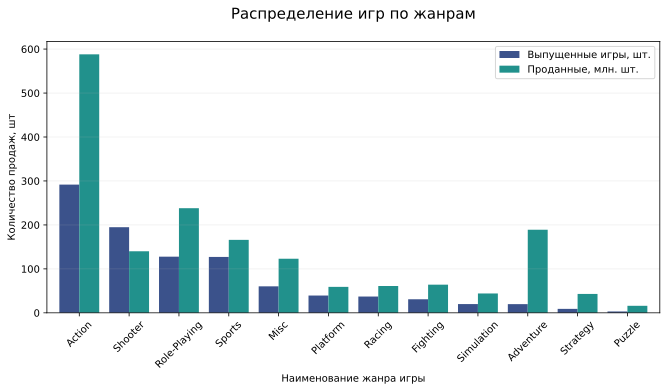

In [267]:
fig, ax = plt.subplots()
bar_plot(data_genre[['total_games', 'total_sales']], colors[:2])

ax.legend(["Выпущенные игры, шт.", "Проданные, млн. шт."])
plt.title("Распределение игр по жанрам"+"\n")
plt.xlabel("Наименование жанра игры")
plt.ylabel("Количество продаж, шт");

In [74]:
data_genre['median'].sort_values()

genre
Adventure       0.030
Puzzle          0.065
Strategy        0.080
Action          0.130
Role-Playing    0.130
Fighting        0.130
Simulation      0.135
Misc            0.170
Racing          0.220
Platform        0.310
Sports          0.365
Shooter         0.585
Name: median, dtype: float64

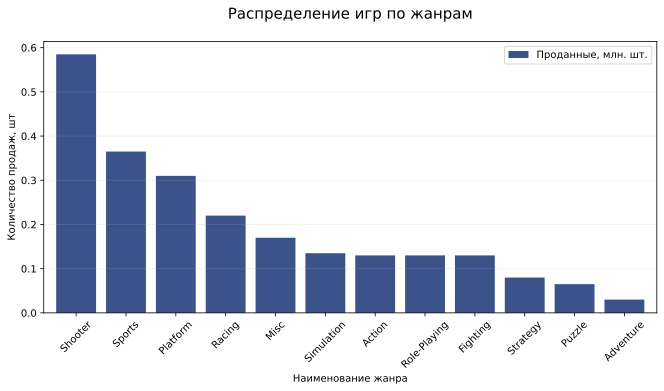

In [268]:
#посмотрим на отличие мединных значний 
fig, ax = plt.subplots()
bar_plot(data_genre['median'].sort_values(ascending=False), colors[0])

ax.legend(["Проданные, млн. шт."])
plt.title("Распределение игр по жанрам"+"\n")
plt.xlabel("Наименование жанра")
plt.ylabel("Количество продаж, шт");

**Вывод:**

* самые популярные продаваемые жанры это 
        - Action (более 600 игр и около 200 миллиона проданных копий)
        - Shooter (171 миллион проданных копий при 128 выпущенных играх) 
        - Sports (109 миллионов проданных копий)
        - Role-Playing (221 выпущенных игр и 101 миллионов проданных копий) 
* самые непопулярные среди пользователей - Puzzle
* производители большего выпустили игр в жанре Action и меньше всего в жанре Puzzle
* производители выпустили практически одинаково количество игр в жанре Sports и Shooter, однако продаж в жанре Sports существенно меньше
* Adventures представлен на рынке в большом количестве, но спрос у пользователей совсем маленький
* разница в продажах между Action(441.12) и Puzzle(4.89) практически в 100 раз

### Портрет пользователя каждого региона (NA, EU, JP)

Определим портрет для пользователя каждого региона (NA, EU, JP):  

* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияние рейтинга ESRB на продажи в отдельном регионе.

#### Популярность платформ по регионам

In [260]:
# опредлим популярность платформ по каждому представленному региону  
df_countries = (df_period.groupby('platform')['na_sales', 'eu_sales', 'jp_sales']
                         .sum()
                         .sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False)
                         
               )
df_countries.T

platform,PS4,X360,XOne,PS3,3DS,WiiU,PC,Wii,PSV,DS,PSP
na_sales,87.25,80.97,78.85,62.83,34.06,27.11,9.75,6.50,4.89,0.57,0.00
eu_sales,109.31,41.81,41.96,66.55,28.63,18.37,21.83,5.82,5.71,0.85,0.17
jp_sales,10.22,0.51,0.33,22.05,59.78,10.21,0.00,0.05,15.03,0.00,3.29


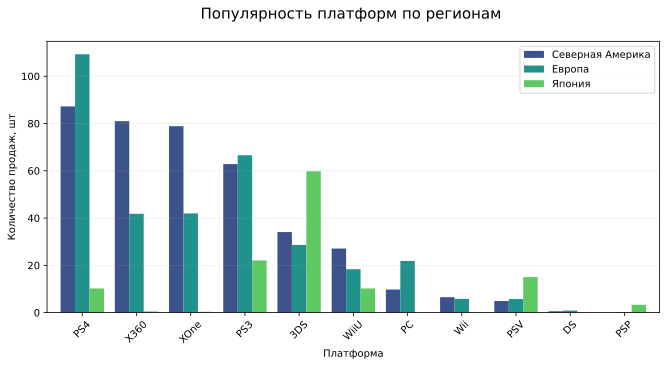

In [269]:
# построим график продаж платформ по регионам
fig, ax = plt.subplots()
bar_plot(df_countries.sort_values(by = "na_sales", ascending=False), colors)

ax.legend(["Северная Америка", "Европа", "Япония"])
plt.title("Популярность платформ по регионам "+"\n")
plt.xlabel("Платформа")
plt.ylabel("Количество продаж, шт");

**Выводы:**

* Самая популярная платформа в Северной Америке и в Европе - PS4
* Мнения в оценке популярности схожи в Серверной Америке и Европе для платформы PS3
* Платформа 3DS сравнительно популярна во всех трех регионах. Для Японии это самая популярная платформа. Это можно объяснить ее японским происхождением.
* PSV и WiiU популярны только в Японии
* PS4 лидирует в Европе, на высоком уровне в Северной Америке и достаточно хорошо популярна в Японии
* XOne популярна в Америке и в Европе. В Японии она не входит в пять популярных игр.

C учетом вычисленного ранее среднего жизненного цикла присутствия на рыке платформы в 10 лет, нужно обратить внимание на возможный потенциальный рост платформ PS4 и XOne

#### Популярность жанров по регионам

In [264]:
#опредлим популярные жанры для представленных регионов 
df_genre = (df_period.groupby('genre')['na_sales', 'eu_sales', 'jp_sales']
                     .sum()
                     .sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False)
                     .head(5)
           )
df_genre.T

genre,Action,Shooter,Sports,Role-Playing,Misc
na_sales,116.76,93.50,57.73,40.51,26.73
eu_sales,107.45,71.96,48.51,32.69,19.38
jp_sales,33.42,5.55,4.49,44.43,8.16


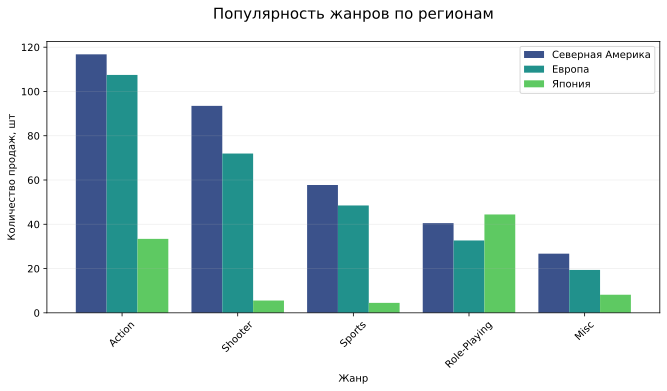

In [270]:
#визуализация даных
fig, ax = plt.subplots()

bar_plot(df_genre, colors)

ax.legend(["Северная Америка", "Европа", "Япония"])
plt.title("Популярность жанров по регионам"+"\n")
plt.xlabel("Жанр")
plt.ylabel("Количество продаж, шт");

**Выводы:**

* в Америке и Европе лидирует жанр Action. В Японии он на втором месте после Ролевых игр.
* вкусы Европы и Америки в жанрах Role-Playing, Shootter, Sports, Action схожи
* взгляды на жанр во всех трех регионах схожи на ролевые игры
* выбор Японии существенно отличается от двух других регионов. В этом регионе мало интересуются играми в жанре Shootter, Sports


Видна схожесть Северной Америки и Европы. Япония, в силу культурных особенностей и территориальной удаленности сильно отличается. Совершенно разные рынки, разные предпочтения.


####  Влияние рейтинга ESRB на продажи в отдельном регионе

In [322]:
#Данные о самых популярных жанрах по регионам
df_esrbs = (df_period.query('rating != "NN"')
                    .pivot_table(
                        index = 'rating',
                        values=('eu_sales','na_sales','jp_sales'),
                        aggfunc='sum').sort_values(by="T", ascending=False, axis=1).sort_values(by='na_sales', ascending=False)
           )
df_esrbs

,na_sales,eu_sales,jp_sales
rating,,,
M,149.54,128.78,12.91
E,71.08,69.75,14.07
E10+,50.43,38.88,5.44
T,40.84,32.16,18.32


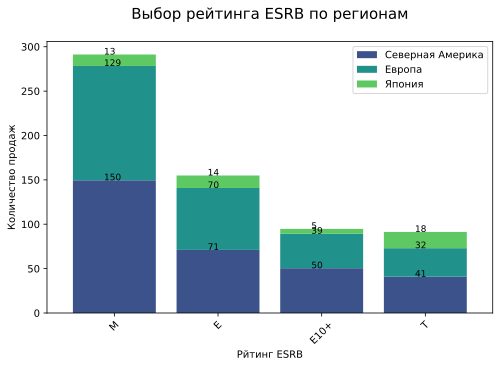

In [328]:
# отобразим данные с числовыми значениями 
fig, ax = plt.subplots(figsize=(8,5))
b =( 
    df_esrbs.plot(kind='bar', 
                  stacked= True, 
                  width=0.8,  
                  color=colors, 
                  ax=ax)
    .grid(False)  
    )

ax.legend(["Северная Америка", "Европа", "Япония"])
plt.title("Выбор рейтинга ESRB по регионам" + "\n")
plt.xlabel("Рйтинг ESRB")
plt.xticks(rotation=45)
plt.ylabel("Количество продаж");

for n, x in enumerate([*df_esrbs.index.values]):
    for (proportion, y_loc) in zip(df_esrbs.loc[x],
                                   df_esrbs.loc[x].cumsum()):
                
        plt.text(x=n - 0.1,
                 y=y_loc,
                 s=round(proportion), 
                 color="black",
                 fontsize=9)


E («Everyone») — «Для всех»  
E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»  
T («Teen») — «Подросткам»  
M («Mature») — «Для взрослых»

**Выводы:**
* в Европе и Северной Америке определяется схожесть с выбором и самые популярные - это игры для взрослых.
* для Японии самая популярная категория Е -  для всех. 
* категория для взрослых в Японии на только на 3 месте.

Япония по рейтингу ESRB, жанрам имеет существенное отличие от двух других регионов. На вкусы людей сильное влияние может оказывать локация, в которой они живут и культура. Так же, конечно, с точки зрения распространения идеологий развития Америки и Европы, оказывается минимальным влияние на Японию, из-за территориальной удаленности. Рынки разные, в зависимости от региона и культуры.


### Проверка гипотез

В результате исследовательской работы необходимо проверить две гипотезы:

* Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные

####  Гипотеза 1

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем нулевую и альтеративные гипотезы:  

$\begin{equation*}
 \begin{cases}
   H_0 :\text{средние пользовательские рейтинги платформ Xbox One и PC одинаковы}\\
   H_1 :\text{средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

In [348]:
# подготовим совокупности для анализа
xone =  df_period[(df_period['user_score'].isna()==False) & (df_period['platform']=='XOne')].user_score
pc = df_period[(df_period['user_score'].isna()==False) & (df_period['platform']=='PC')].user_score

In [350]:
# определим размер
print('Размер совокупности ХOne:', len(xone))
print('Размер совокупности PC:', len(pc))

Размер совокупности ХOne: 116
Размер совокупности PC: 110


In [351]:
# посчитаем дисперсию совокупностей
print('Дисперсия совокупности ХOne:', np.var(xone))
print('Дисперсия совокупности PC:', np.var(pc))

Дисперсия совокупности ХOne: 1.6451872770511302
Дисперсия совокупности PC: 3.0387966942148776


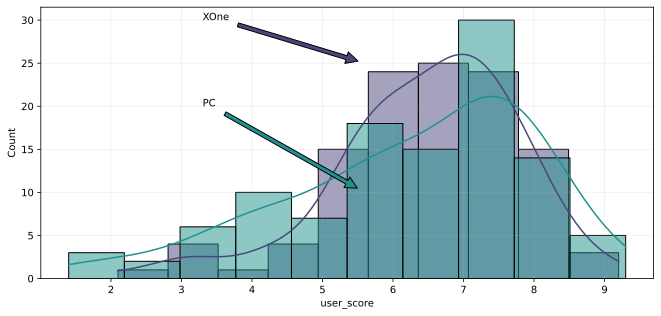

In [352]:
# визуализируем распрделение данных
ax1= sns.histplot(df_period.query('platform == "XOne"  ').user_score,  \
             kde=True, bins=10, color = '#4a477c', label=None);

ax2=sns.histplot(df_period.query('platform == "PC"  ').user_score,  \
             kde=True, bins=10, color = '#1f928d');
ax1.annotate('XOne', xy=(5.6, 25), xytext=(3.3, 30),
                   arrowprops=dict(facecolor='#4a477c', shrink=0.05))
ax2.annotate('PC', xy=(5.6, 10), xytext=(3.3, 20),
                   arrowprops=dict(facecolor='#1f928d', shrink=0.05));

**Для проверки гипотез будем использовать двусторонний t-тест Стьюдента** 

Чтобы примененить t-тест, для сравнения двух выборок, нам необходимо, чтобы выборки были независимы. Мы сравниваем две выборки по пользовательским оценкам на PС и Xbox. Это будут независимые выборки, потому что они не пересекаются, мы не можем оценить пользовательские оценки для PC, взяв пользовательские оценки для Xbox.  

Выборочные средние, благодаря центральной предельной теореме, будут всегда нормально распределены и второе необходимое условие для проведения t-теста двух выборок выполняется. Наше количество данных позволяет нам соблюсти ЦПТ.  

И последнее, нам остается понять, равны или различные дисперсии наших генеральных совокупностей. Это условие самое сложное, ведь точно мы никогда этого не сможем сказать, можем только предполагать по нашим выборкам. Теоретический блок курса советует, если есть сомнения, что дисперсии генеральных совокупностей равны, то ставить "equal_var == False". Данные сомнения могут возникнуть у нас в том случае, если две группы отличаются по другим параметрам, а не только по тому, что мы сравниваем. В нашем примере, сравнивая платформы PC и Xbox, то они отличаются и по стоимости игр, можно предположить, что отличаются по времени, которое проводят пользователи за играми и по тому, как пользователи могут оценивать игры, например, пользователи на PC больше оценивают графику, а пользователи на Xbox - удобство управления с геймпада. У нас появились сомнения, что дисперсии могут быть одинаковыми - ставим "equal_var == False".

In [353]:
alpha = 0.05
results = st.ttest_ind(xone, pc, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2867036680187632
Не получилось отвергнуть нулевую гипотезу


In [354]:
#проверим результаты теста подсчетом медианных значений, так как наши выборки скошенные
print('Медиана PC', pc.median())  
print('Медиана XOne', xone.median())

Медиана PC 6.75
Медиана XOne 6.7


По результатам теста мы не смогли отвергнуть нулевую гипотзу: средние пользовательские рейтинги платформ Xbox One и PC одинаковы

####  Гипотеза 2

**Средние пользовательские рейтинги жанров Action и Sports разные**

Сформулируем нулевую и альтеративные гипотезы:  

$\begin{equation*}
 \begin{cases}
   H_0 :\text{средние пользовательские рейтинги жанров Action и Sports одинаковые}\\
   H_1 :\text{средние пользовательские рейтинги жанров Action и Sports отличаются между собой}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

In [362]:
#подготовим совокупности для анализа
actions = df_period[(df_period['user_score'].isna()==False) & (df_period['genre']=='Action')].user_score
sports = df_period[(df_period['user_score'].isna()==False) & (df_period['genre']=='Sports')].user_score

In [363]:
#Посмотрим размер совокупности
print('Размер совокупности Action:', len(actions))
print('Размер совокупности Sports:', len(sports))

Размер совокупности Action: 304
Размер совокупности Sports: 123


In [364]:
# Посчитаем дисперсию совокупностей
print('Дисперсия совокупности Action:', np.var(actions))
print('Дисперсия совокупности Sports:', np.var(sports))

Дисперсия совокупности Action: 1.6451825441481964
Дисперсия совокупности Sports: 2.8780421706656094


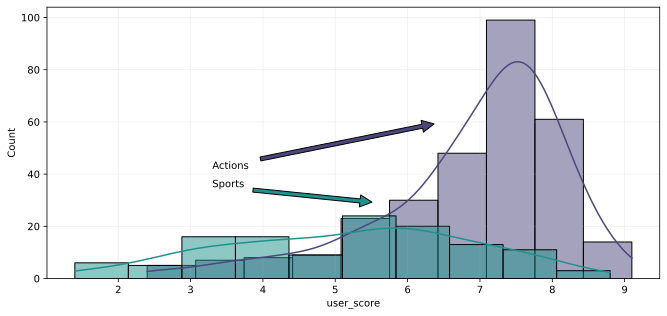

In [365]:
#Посмотрим на распределние данных
ax1 = sns.histplot(actions, kde=True, bins=10, color = '#4a477c', label=None);
ax2 = sns.histplot(sports,  kde=True, bins=10, color = '#1f928d');

ax1.annotate('Actions', xy=(6.5, 60), xytext=(3.3, 42), arrowprops=dict(facecolor='#4a477c', shrink=0.05))
ax2.annotate('Sports', xy=(5.6, 29), xytext=(3.3, 35), arrowprops=dict(facecolor='#1f928d', shrink=0.05));

**Для проверки гипотез будем сполььзован двусторонний t-тест Стьюдента.** 

Чтобы примененить t-теста, для сравнения двух выборок, нам необходимо, чтобы выборки были независимы. Мы сравниваем две выборки с разыми типа жанра.Это будут независимые выборки, потому что они не пересекаются. Для каждой игры у нас только один тип жанра  
Выборочные средние, благодаря центральной предельной теореме, будут всегда нормально распределены и второе необходимое условие для проведения t-теста двух выборок выполняется. Наше количество данных позволяет нам соблюсти ЦПТ.  

Теоретический блок курса советует, если есть сомнения, что дисперсии генеральных совокупностей равны, то ставить "equal_var == False". Данные сомнения могут возникнуть у нас в том случае, если две группы отличаются по другим параметрам, а не только по тому, что мы сравниваем. В нашем примере, сравнивая платформы Actions и Sports, то они виду жанра и прочему восприятию которые характризуют определяющие черты. У нас появились сомнения, что дисперсии могут быть одинаковыми - ставим "equal_var == False".

In [366]:
alpha = 0.05
results = st.ttest_ind(actions, sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.5076737062533683e-19
Отвергаем нулевую гипотезу


In [367]:
#проверим результаты теста подсчетом медианных значений, так как наши выборки скошенные
print('Медиана Actions', actions.median())  
print('Медиана Sports', pc.median())

Медиана Actions 7.2
Медиана Sports 6.75


По результатам теста мы отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые

## Вывод

**В результате проведённой работы были выявлены закономерности, которые помогут спрогнозировать характеристики отбора игры, для проведения рекламных мероприятий и формирования денежных средств на их проведение**

Характеристики для отбора потенциальных игр, на перспективный год:

* `платформы, на которые должна игра быть распространена -  PS4 и XOne.`  
Данные платформы на рынке только 4 года и у них отмечен хороший рост популярности и потенциал продаж. Общий срок жизненного цикла платформы составляет 10 лет.  
  
  
* `жанры, в которых игра должна быть - Action, Shootter или Role-Playing.` К последнему жанру надо особенно внимательно отнестись, так как он популярен практически для всех исследованных регионах и имеет сравнительно одинаковые значения популярности.
  
  
* `категория игры по рейтингу ESRB должна быть "Для взрослых" или "Для всех".` Данные категории самые популярные среди Северной Америки, Европы и Японии. Но это только для игр, которые выпущены в Северной Америке  
  
  
* `необходимо обращать внимание на рейтинг критиков, которые оценивают игры.` Зависимость рейтинга критиков от продаж игры прямая и положительная - чем выше оценка, тем больше продаж.

В рамках исследования мы проверили две гипотезы и установили:
  
1. С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.
2. С большой долей вероятности средние пользовательские рейтинги женров Action и Sports имеют статистически значимые отличия.
 